In [68]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
from lmfit.models import ExponentialModel, GaussianModel

data10keV = pd.read_csv('data10keV.csv')
data30keV = pd.read_csv('data30keV.csv')
data50keV = pd.read_csv('data50keV.csv')
data70keV = pd.read_csv('data70keV.csv')
data90keV = pd.read_csv('data90keV.csv')
fine10keV = pd.read_csv('fine10keV.csv')
fine30keV = pd.read_csv('fine30keV.csv')
fine50keV = pd.read_csv('fine50keV.csv')
fine70keV = pd.read_csv('fine70keV.csv')
fine90keV = pd.read_csv('fine90keV.csv')

In [69]:
np.array(data30keV['DEPTH'])[-1]

49.5

In [70]:
def plot3dVacancy(DEPTH,data,thickness,lab):

    ax.plot(DEPTH,data, zs=thickness, zdir='y', linestyle = '--', lw = 1.3)

    
    obj = ax.fill_between(DEPTH, 0, data, step='mid', alpha=0.1) 
    ax.add_collection3d(obj, zs = thickness, zdir = 'y')

# def plot3dVacancy(DEPTH,data,thickness,lab,c):
#     model1 = GaussianModel() 
#     model = model1
#     params = model.make_params()

#     params['amplitude'].set(value = 2e8, vary=True)
#     params['center'].set(value = 0, vary=True)
#     params['sigma'].set(value = 7.5, vary=True)
#     model_fit = model.fit(data, params, x=DEPTH)
#     fit_x = np.linspace(0,np.array(DEPTH)[-1],1000)
#     fitcurve = model_fit.eval(model_fit.params, x = fit_x)
#     ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', lw = 1.3, color = c)
    
#     obj = ax.fill_between(fit_x, 0, fitcurve,color = c, step='mid', alpha=0.1) 
#     ax.add_collection3d(obj, zs = thickness, zdir = 'y')

In [71]:
# def plot3dSilicon(DEPTH,data,thickness,lab):
#     if lab == 0:
#         ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = 'aqua')
#     else:
#         ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = 'aqua', label = 'Si')

def plot3dSilicon(DEPTH,data,thickness,lab,c):
    if lab == 0:
        ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = c)
    else:
        ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = c, label = 'Si')

In [72]:
def plot3dGallium(depth,data,thickness,lab):
    model1 = GaussianModel() 
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 1e6, vary=True)
    params['center'].set(value = 10, vary=True)
    params['sigma'].set(value = 3, vary=True)
    model_fit = model.fit(data, params, x=depth)
    fit_x = np.linspace(0,80,1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    if lab == 0:
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', lw = 1, color = 'k')
    else:
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', lw = 1, color = 'k', label = 'Ga$^+$')

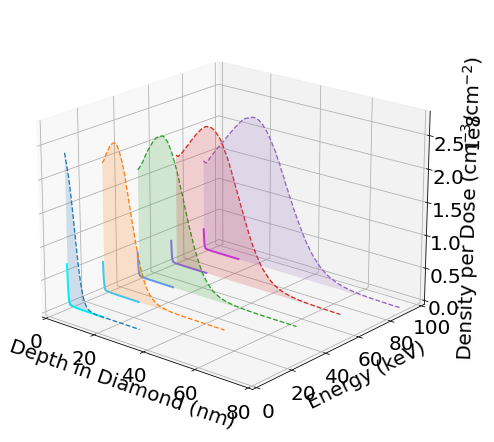

In [73]:
cmap = cm.cool  # You can choose a different colormap
colors = [cmap(i / 5) for i in range(5)]
plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 20*cm))
ax = fig.add_subplot(projection='3d')
plt.grid()

# ax.legend()
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)
ax.set_zlim(0, 2.8e8)
ax.set_xlabel('Depth in Diamond (nm)')
ax.set_ylabel('Energy (keV)')
ax.set_zlabel('Density per Dose (cm$^{-3}$/cm$^{-2}$)')

plot3dSilicon(fine10keV['DEPTH'],fine10keV['Si'], 10,1, colors[0])
plot3dSilicon(fine30keV['DEPTH'],fine30keV['Si'], 30,0, colors[1])
plot3dSilicon(fine50keV['DEPTH'],fine50keV['Si'],50,0, colors[2])
plot3dSilicon(fine70keV['DEPTH'],fine70keV['Si'], 70,0, colors[3])
plot3dSilicon(fine90keV['DEPTH'],fine90keV['Si'], 90,0, colors[4])

# plot3dGallium(data10keV['DEPTH'],data10keV['Ga'], 10,1)
# plot3dGallium(data30keV['DEPTH'],data30keV['Ga'], 30,0)
# plot3dGallium(data50keV['DEPTH'],data50keV['Ga'],50,0)
# plot3dGallium(data70keV['DEPTH'],data70keV['Ga'], 70,0)
# plot3dGallium(data90keV['DEPTH'],data90keV['Ga'], 90,0)


# plot3dVacancy(data10keV['DEPTH'][1:],data10keV['C'][1:]*1e8, 10,1, colors[0])
# plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0, colors[1])
# plot3dVacancy(data50keV['DEPTH'][4:],data50keV['C'][4:]*1e8,50,0, colors[2])
# plot3dVacancy(data70keV['DEPTH'][1:],data70keV['C'][1:]*1e8, 70,0, colors[3])
# plot3dVacancy(data90keV['DEPTH'][2:],data90keV['C'][2:]*1e8, 90,0, colors[4])

plot3dVacancy(data10keV['DEPTH'][0:],data10keV['C'][0:]*1e8, 10,1)
plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0)
plot3dVacancy(data50keV['DEPTH'][1:],data50keV['C'][1:]*1e8,50,0)
plot3dVacancy(data70keV['DEPTH'][3:],data70keV['C'][3:]*1e8, 70,0)
plot3dVacancy(data90keV['DEPTH'][1:],data90keV['C'][1:]*1e8, 90,0)


ax.view_init(elev=20., azim=-50)

# ax.legend()

# plt.savefig("variableEnergy.svg", format="svg",transparent=True)

fig.savefig('finalPlot.svg', format= 'svg',transparent=True)
